## This is a sample implementation from Github repository

https://github.com/sigvaldm/localreg

In [2]:
# installing and importing the module

try:
    from localreg import *
except:
    !pip install localreg
    from localreg import *

print('Done')

Done


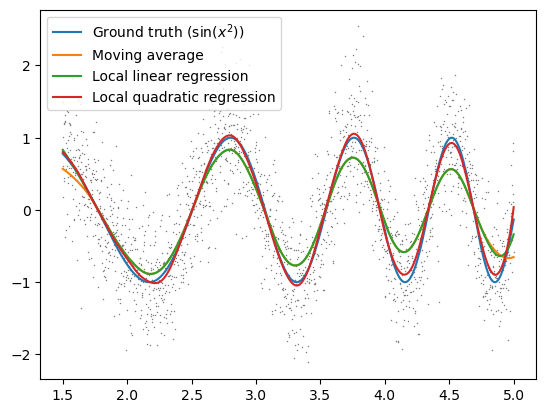

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from localreg import *

np.random.seed(1234)
x = np.linspace(1.5, 5, 2000)
yf = np.sin(x*x)
y = yf + 0.5*np.random.randn(*x.shape)

y0 = localreg(x, y, degree=0, kernel=rbf.tricube, radius=0.3)
y1 = localreg(x, y, degree=1, kernel=rbf.tricube, radius=0.3)
y2 = localreg(x, y, degree=2, kernel=rbf.tricube, radius=0.3)

plt.plot(x, y, '+', markersize=0.6, color='gray')
plt.plot(x, yf, label='Ground truth ($\sin(x^2)$)')
plt.plot(x, y0, label='Moving average')
plt.plot(x, y1, label='Local linear regression')
plt.plot(x, y2, label='Local quadratic regression')
plt.legend()
plt.show()

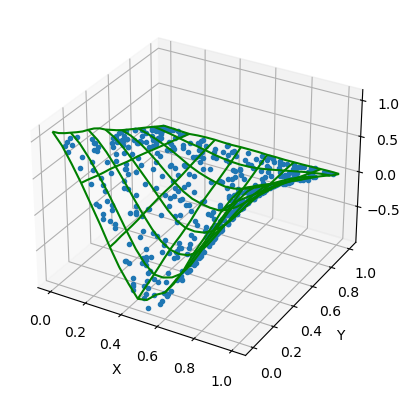

In [5]:
from localreg import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Axes3D import has side effects, it enables using projection='3d' in add_subplot
import numpy as np

N = 500
degree=1

x = np.random.rand(N,2)
y = np.cos(2*np.pi*x[:,0])*(1-x[:,1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

m = np.arange(0, 1.05, 0.05)
X, Y = np.meshgrid(m,m)
x0 = np.array([np.ravel(X), np.ravel(Y)]).T
z0 = localreg(x, y, x0, degree=degree, radius=0.2)
Z = z0.reshape(X.shape)

ax.plot_wireframe(X, Y, Z, rcount=10, ccount=10, color='green')
ax.plot3D(x[:,0], x[:,1], y, '.')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

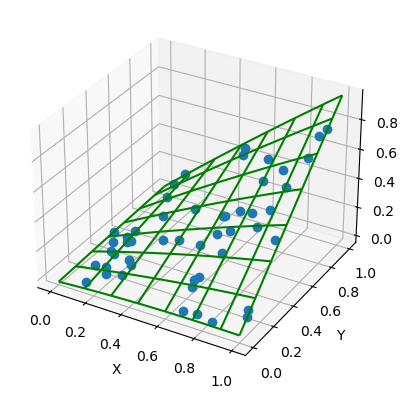

In [7]:
from localreg import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Axes3D import has side effects, it enables using projection='3d' in add_subplot
import numpy as np

N = 50
degree=2

x = np.random.rand(N,2)
y = x[:,0]*x[:,1] + 0.02*np.random.randn(N)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

m = np.arange(0, 1.05, 0.05)
X, Y = np.meshgrid(m,m)
x0 = np.array([np.ravel(X), np.ravel(Y)]).T
z0 = polyfit(x, y, x0, degree=degree)
Z = z0.reshape(X.shape)

ax.plot_wireframe(X, Y, Z, rcount=10, ccount=10, color='green')
ax.plot3D(x[:,0], x[:,1], y, 'o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Radial Basis Function

Adapting normalization
Computing centers
Fitting weights


/Users/carbon/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


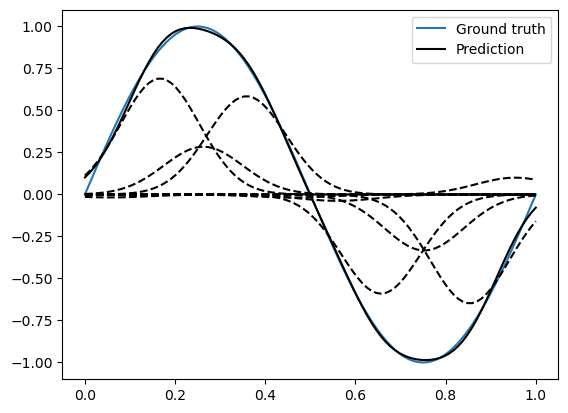

In [26]:
from localreg import RBFnet
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,100)
y = np.sin(2*np.pi*x)

net = RBFnet()
net.train(x, y, num=10, radius=0.3)

plt.plot(x, y, label='Ground truth')
y_pred = net.predict(x)
net.plot_bases(plt.gca(), x, label='Prediction')
# plt.plot(x, y_pred, label='Prediction')
plt.legend()
plt.show()

Adapting normalization
Computing centers
Fitting weights
  it.    radius                error               
  1      0.8851134598600663    0.012486009359988387


/Users/carbon/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  2      0.8851162213650716    0.0124860093223798  


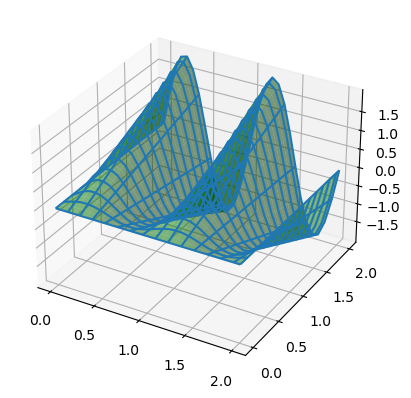

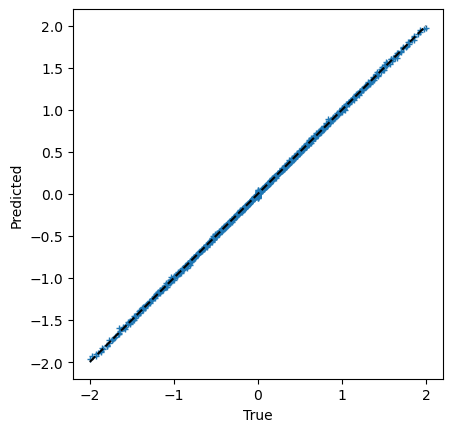

In [9]:
from localreg import RBFnet, plot_corr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Enables 3d-projection

x = np.linspace(0,2,30)
X, Y = np.meshgrid(x, x)

input = np.array([X.ravel(), Y.ravel()]).T
x, y = input.T
z = y*np.sin(2*np.pi*x)

net = RBFnet()
net.train(input, z, num=50)
z_hat = net.predict(input)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, z.reshape(X.shape), rcount=20, ccount=20)
ax.plot_surface(X, Y, z_hat.reshape(X.shape), alpha=0.5, color='green')
plt.show()

fig, ax = plt.subplots()
plot_corr(ax, z, z_hat)
plt.show()

Adapting normalization
Computing centers
Fitting weights
Adapting normalization
Computing centers
Fitting weights
              RMSE   RMSRE
Normal LLS    0.638  0.167
Relative LLS  1.17   0.047


/Users/carbon/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carbon/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


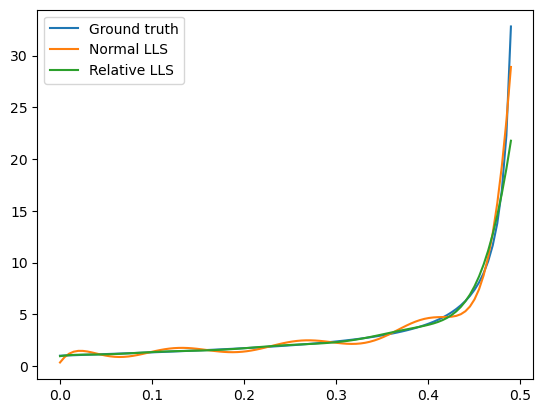

In [13]:
from localreg import RBFnet
from localreg.metrics import rms_error, rms_rel_error
# !pip install frmt
from frmt import print_table
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,0.49,100)
y = np.tan(np.pi*x)+1

net = RBFnet()

net.train(x, y, radius=1)
y_hat0 = net.predict(x)

net.train(x, y, radius=1, relative=True)
y_hat1 = net.predict(x)

print_table(
    [[''            , 'RMSE'              , 'RMSRE'                  ],
     ['Normal LLS'  , rms_error(y, y_hat0), rms_rel_error(y , y_hat0)],
     ['Relative LLS', rms_error(y, y_hat1), rms_rel_error(y , y_hat1)]]
)

plt.figure()
plt.plot(x, y, label='Ground truth')
plt.plot(x, y_hat0, label='Normal LLS')
plt.plot(x, y_hat1, label='Relative LLS')
plt.legend()
plt.show()

Adapting normalization
Computing centers
Fitting weights
  it.    radius                error               
  1      1.8938262504945031    2.8269961864844613e-07
  2      1.8940975102026192    2.8250423813137864e-07
  3      1.8940973583472154    2.8257927013100067e-07
  4      1.8940875403345518    2.8270468406426704e-07
  5      1.8940875403345518    2.8239199756114595e-07


/Users/carbon/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


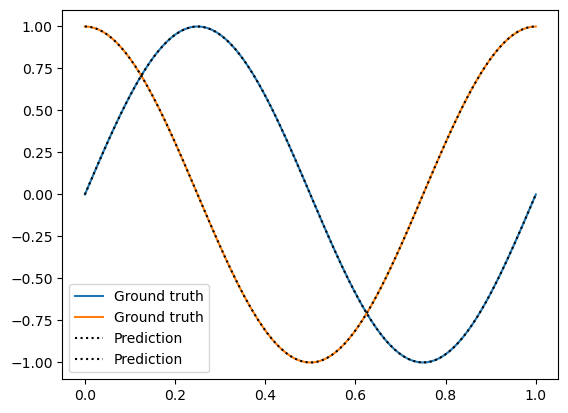

In [14]:
from localreg import RBFnet
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,100)
y = np.zeros((len(x), 2))
y[:,0] = np.sin(2*np.pi*x)
y[:,1] = np.cos(2*np.pi*x)

net = RBFnet()
net.train(x, y)
yhat = net.predict(x)

plt.plot(x, y[:,0], 'C0', label='Ground truth')
plt.plot(x, y[:,1], 'C1', label='Ground truth')
plt.plot(x, yhat[:,0], ':k', label='Prediction')
plt.plot(x, yhat[:,1], ':k', label='Prediction')
plt.legend()
plt.show()